In [1]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.axes import Axes

def round_to_nearest(x, base):
    return base * np.round(x/base)

checker_size = 24 #mm
savefig_kwargs = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0}

def read_measurements(path):
    f = glob.glob(path)[-1]
    data = pd.read_csv(f, names=["x", "y", "z"]) * 1000
    data["y"] -= checker_size
    data[["x0", "y0"]] = round_to_nearest(data[["x", "y"]], checker_size).astype(int)
    data["z0"] = 0
    data["ex"] = data["x"] - data["x0"]
    data["ey"] = data["y"] - data["y0"]
    data["ez"] = data["z"] - data["z0"]
    return data

TEST_TYPE = "proposed"
data_predicted = read_measurements(f"tip_measurements/{TEST_TYPE}/predicted_*.csv")
data_smoothed = read_measurements(f"tip_measurements/{TEST_TYPE}/smoothed_*.csv")
data_smoothed.head(2)

,x,y,z,x0,y0,z0,ex,ey,ez
0,0.513679,0.824500,0.243633,0,0,0,0.513679,0.824500,0.243633
1,-0.167161,1.893241,0.274934,0,0,0,-0.167161,1.893241,0.274934


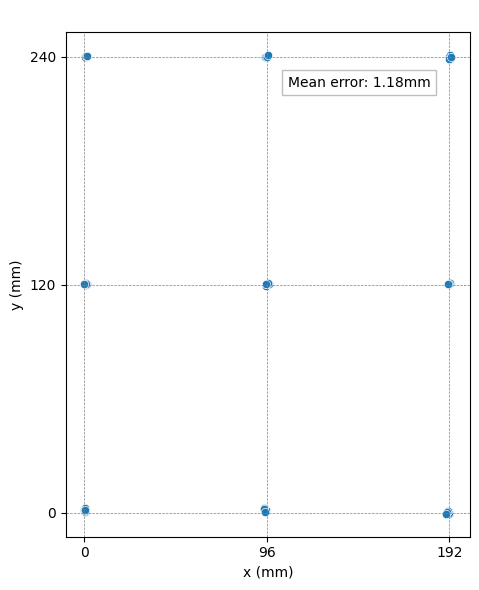

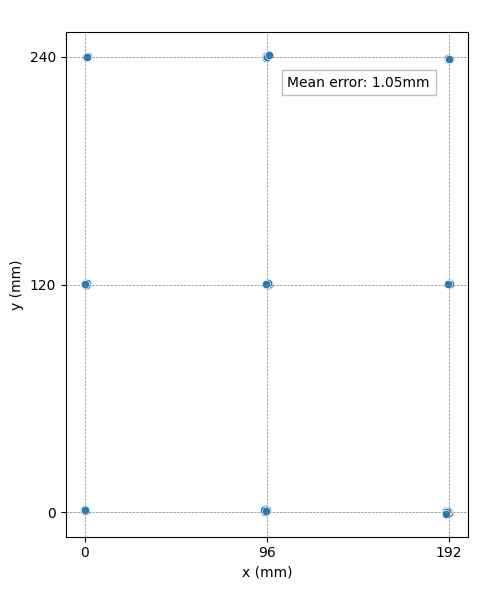

In [16]:
%matplotlib inline
def zoomout_plot(data):
    fig = plt.figure()
    ax: Axes = sns.scatterplot(data=data, x="x", y="y")
    ax.set_aspect("equal")
    x0vals = [0, 96, 192]
    y0vals = [0, 120, 240]
    ax.set(xlabel="x (mm)", ylabel="y (mm)", title=" ", xticks=x0vals, yticks=y0vals)
    for x in x0vals:
        ax.axvline(x, color="grey", linestyle="--", linewidth=0.5)
    for y in y0vals:
        ax.axhline(y, color="grey", linestyle="--", linewidth=0.5)
    mean_error = np.sqrt(data["ex"]**2 + data["ey"]**2 + data["ez"]**2).mean()
    ax.text(192-10, 240-10, f"Mean error: {mean_error:0.2f}mm", color="black", ha="right", va="top",
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='grey')
    )
    ax.figure.set_figheight(6)
    plt.tight_layout()

zoomout_plot(data_predicted)
plt.savefig(f"tip_measurements/{TEST_TYPE}/zoomout-predicted.pdf", **savefig_kwargs)
zoomout_plot(data_smoothed)
plt.savefig(f"tip_measurements/{TEST_TYPE}/zoomout-smoothed.pdf", **savefig_kwargs)

In [115]:
# %matplotlib widget
# fig = plt.figure()
# plt.axes()
# sns.histplot(data=data_smoothed, x="ey", bins=10)
# plt.show()

c:\Users\James\Files\git\dpoint\python\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\James\Files\git\dpoint\python\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\James\Files\git\dpoint\python\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\James\Files\git\dpoint\python\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\James\Files\git\dpoint\python\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\James\Files\git\dpoint\python\venv\Lib\site-packages\seaborn\axisgrid.p

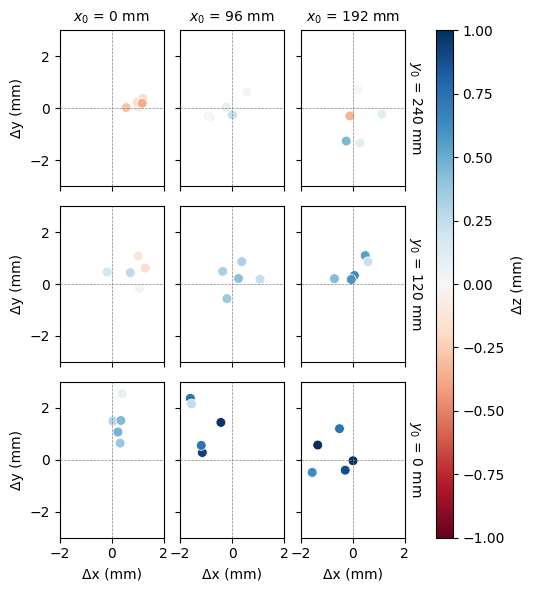

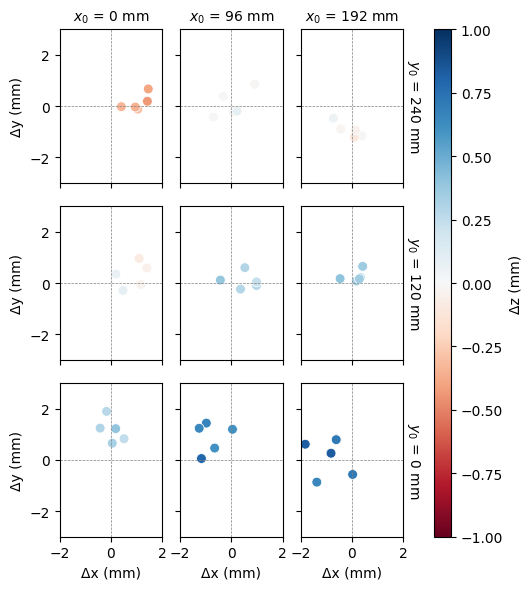

In [15]:
def zoomin_plot(data):
    g = sns.FacetGrid(data=data, col="x0", row="y0", margin_titles=True, despine=False, sharex=True, sharey=True, aspect=0.9, height=2, row_order=[240, 120, 0])
    norm = plt.Normalize(-1, 1)
    g.map_dataframe(sns.scatterplot, x="ex", y="ey", hue="ez", palette='RdBu', s=50, hue_norm=norm)
    g.tight_layout()
    g.set_axis_labels("Δx (mm)", "Δy (mm)")
    g.refline(x=0, y=0, linestyle="--", linewidth=0.5)
    g.set(xlim=(-2, 2), ylim=(-3, 3))
    g.set(aspect="equal")
    g.set_titles(col_template="$x_0$ = {col_name} mm", row_template="$y_0$ = {row_name:0} mm")
    sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
    sm.set_array([])
    g.figure.colorbar(sm, ax=g.axes, label="Δz (mm)", aspect=30, pad=0.07)
    g.figure.set_figheight(6)

zoomin_plot(data_predicted)
plt.savefig(f"tip_measurements/{TEST_TYPE}/zoomin-predicted.pdf", **savefig_kwargs)
zoomin_plot(data_smoothed)
plt.savefig(f"tip_measurements/{TEST_TYPE}/zoomin-smoothed.pdf", **savefig_kwargs)
